# INFO8010 Deep Learning - An introduction to PyTorch
*Joeri Hermans*<br>
*University of Liège, Belgium*<br>
[joeri.hermans@doct.uliege.be](mailto:joeri.hermans@doct.uliege.be)

In [1]:
!date

Thu Mar 14 19:56:41 CET 2019


## Front matter

The PyTorch documentation provides a great resource and is significantly more detailed than this lecture. Introductory concepts include:
- [Main concepts such as `tensors` and `autograd`](https://pytorch.org/tutorials/beginner/pytorch_with_examples.html).
- A 60-minute [crash-course](https://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html) covering the main usage.
- [Loading and processing data](https://pytorch.org/tutorials/beginner/data_loading_tutorial.html).
- [Saving and loading models](https://pytorch.org/tutorials/beginner/saving_loading_models.html).
- [Syntactic sugar with torch.nn](https://pytorch.org/tutorials/beginner/nn_tutorial.html).
- [Transfer learning](https://pytorch.org/tutorials/beginner/transfer_learning_tutorial.html).
- [Building a chatbot model](https://pytorch.org/tutorials/beginner/chatbot_tutorial.html).
- [Deploying a Seq2Seq model (chatbot) with the Hybrid frontend -> "compile" to graph](https://pytorch.org/tutorials/beginner/deploy_seq2seq_hybrid_frontend_tutorial.html).
- [Generative Adversarial Networks (DCGAN) using the faces dataset](https://pytorch.org/tutorials/beginner/dcgan_faces_tutorial.html).
- [Reinforcement learning (DQN) tutorial](https://pytorch.org/tutorials/intermediate/reinforcement_q_learning.html).
- [Writing distributed applications](https://pytorch.org/tutorials/intermediate/dist_tuto.html).
- [Distributed training](https://pytorch.org/tutorials/beginner/aws_distributed_training_tutorial.html) (including multi-GPU).
- [ONNX](https://pytorch.org/tutorials/advanced/ONNXLive.html) (standard to describe models, useful to transfer between frameworks).
- [Using the C++ API](https://pytorch.org/tutorials/advanced/cpp_frontend.html).

And many more in PyTorch's [examples](https://github.com/pytorch/examples) GitHub repository. Check it out!

## Requirements

- [Anaconda](https://www.anaconda.com/distribution/) Python environment (optional, but recommended). Please do not use `Python 2.7`.
- [PyTorch](https://pytorch.org/get-started/locally/) according to your system configuration.

## Let's start

Have you ever used **numpy** before?

In [2]:
import numpy as np

> NumPy’s main object is the homogeneous multidimensional array. It is a table of elements (usually numbers), all of the same type.

In [3]:
# A 5x5 matrix of samples from Normal(mu=0, sigma=1).
m = np.random.randn(3, 3)

m

array([[ 0.32047051,  0.47874654,  0.59698832],
       [ 0.8223334 ,  0.35458405, -0.5012327 ],
       [-0.20760932,  1.27822624,  1.43864095]])

In fact, from an conceptual point-of-view, `pytorch` and `numpy` are quite similar.

In [4]:
import torch

> A `tensor` is an n-dimensional array.

In [5]:
# A 5x5 tensor of samples from Normal(mu=0, sigma=1).
#t = torch.randn(3, 3)
#t = torch.from_numpy(m)
#t = torch.from_numpy(m).float()
t = torch.tensor(m, dtype=torch.float32)

t

tensor([[ 0.3205,  0.4787,  0.5970],
        [ 0.8223,  0.3546, -0.5012],
        [-0.2076,  1.2782,  1.4386]])

Because of the similarities in the API, I personally use `pytorch` instead of `numpy` for computing projects because of the GPU acceleration. 

Consider the multiplication of the matrix `m`. In `numpy` this is:

In [6]:
np.matmul(m, m)

array([[ 0.37245028,  1.08626617,  0.81020558],
       [ 0.65918049, -0.12126967, -0.40789957],
       [ 0.6859202 ,  2.192755  ,  1.30505866]])

In `pytorch`:

In [7]:
torch.matmul(t, t)

tensor([[ 0.3725,  1.0863,  0.8102],
        [ 0.6592, -0.1213, -0.4079],
        [ 0.6859,  2.1928,  1.3051]])

Alternatively, you can apply an operation on the `tensor` itself:

In [8]:
t.matmul(t)

tensor([[ 0.3725,  1.0863,  0.8102],
        [ 0.6592, -0.1213, -0.4079],
        [ 0.6859,  2.1928,  1.3051]])

## A simple neural network

In this section we will train a simple MLP (multilayered perceptron) with `ReLU` activations. To train the network, we implement gradient descent by hand.

In [9]:
# To draw a progress bar.
from tqdm import tqdm_notebook as tqdm
# Plotting functionality
import matplotlib.pyplot as plt

# Optimization hyperparameters.
batch_size = 32
learning_rate = 1e-6
training_iterations = range(5000)

# Configuration of the neural network.
num_hidden = 1000
num_in = 100
num_out = 1

### `numpy`

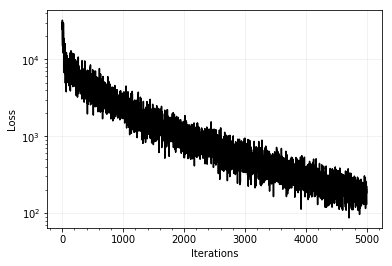

In [10]:
# Randomly initialize the weights.
w_1 = np.random.randn(num_in, num_hidden) # input -> hidden
w_2 = np.random.randn(num_hidden, num_out) # hidden -> output

losses = []
for iteration in tqdm(training_iterations):
    # Fetch the input and corresponding output.
    inputs = np.random.randn(batch_size, num_in)
    targets = np.random.randn(batch_size, num_out)
    
    # Apply the `forward` computation of the neural network (compute the prediction).
    h = np.matmul(inputs, w_1) # You could also do `inputs.dot(w_1)`.
    activation = np.maximum(h, 0)
    y_predicted = np.matmul(activation, w_2)
    
    # Compute loss.
    diff = y_predicted - targets
    loss = np.square(diff).mean()
    losses.append(loss)
    
    # Apply backpropagation.
    grad_y_prediction = 2 * diff
    grad_w_2 = np.matmul(activation.T, grad_y_prediction)
    grad_activation = np.matmul(grad_y_prediction, w_2.T)
    grad_h = grad_activation.copy()
    grad_h[h < 0] = 0 # Gradient of ReLU is h (except for activations < 0, then it is 0).
    grad_w_1 = np.matmul(inputs.T, grad_h)
    
    # Update the weights.
    w_1 -= learning_rate * grad_w_1
    w_2 -= learning_rate * grad_w_2
    
# Show the loss over the training iterations.
plt.plot(training_iterations, losses, color="black")
plt.minorticks_on()
plt.yscale("log")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.grid(True, alpha=.2)
plt.show()

### `pytorch` (no autograd)

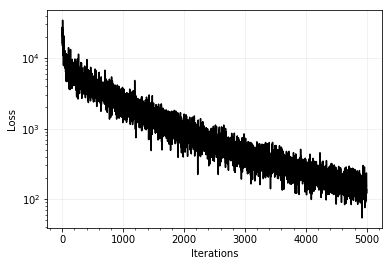

In [11]:
# Randomly initialize the weights.
w_1 = torch.randn(num_in, num_hidden) # input -> hidden
w_2 = torch.randn(num_hidden, num_out) # hidden -> output

losses = []
for iteration in tqdm(training_iterations):
    # Fetch the input and corresponding output.
    inputs = torch.randn(batch_size, num_in)
    targets = torch.randn(batch_size, num_out)
    
    # Apply the `forward` computation of the neural network (compute the prediction).
    h = torch.matmul(inputs, w_1)
    activation = torch.clamp(h, min=0)
    y_predicted = torch.matmul(activation, w_2)
    
    # Compute loss.
    diff = y_predicted - targets
    loss = torch.pow(diff, 2).mean()
    losses.append(loss)
    
    # Apply backpropagation.
    grad_y_prediction = 2 * diff
    grad_w_2 = torch.matmul(activation.t(), grad_y_prediction)
    grad_activation = torch.matmul(grad_y_prediction, w_2.t())
    grad_h = grad_activation.clone()
    grad_h[h < 0] = 0 # Gradient of ReLU is h (except for activations < 0, then it is 0).
    grad_w_1 = torch.matmul(inputs.t(), grad_h)
    
    # Update the weights.
    w_1 -= learning_rate * grad_w_1
    w_2 -= learning_rate * grad_w_2
    
# Show the loss over the training iterations.
plt.plot(training_iterations, losses, color="black")
plt.minorticks_on()
plt.yscale("log")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.grid(True, alpha=.2)
plt.show()

### `pytorch` (with autograd)

Obviously, implementing the backward pass by hand for complex models is kinda tricky (can you imagine doing this in the 90's?), and you will have to rely on a lot of diagnostics to verify your implementation. Luckily, we have [PyTorch's autodifferentiation](https://pytorch.org/docs/stable/autograd.html) to handle this in the background.

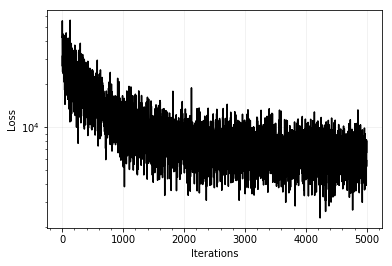

In [12]:
# Randomly initialize the weights.
w_1 = torch.randn(num_in, num_hidden) # input -> hidden
w_2 = torch.randn(num_hidden, num_out) # hidden -> output

# We would like to compute the gradient with respect to the parameters of the model.
w_1.requires_grad = True
w_2.requires_grad = True

losses = []
for iteration in tqdm(training_iterations):
    # Fetch the input and corresponding output.
    inputs = torch.randn(batch_size, num_in)
    targets = torch.randn(batch_size, num_out)
    
    # Apply the `forward` computation of the neural network (compute the prediction).
    h = torch.matmul(inputs, w_1)
    activation = torch.clamp(h, min=0)
    y_predicted = torch.matmul(activation, w_2)
    
    # Compute loss.
    diff = y_predicted - targets
    loss = torch.pow(diff, 2).mean()
    losses.append(loss)
    
    # Apply backpropagation.
    loss.backward()
    
    # Update the weights.
    with torch.no_grad():
        # Update the weights with the derrived gradients.
        w_1 -= learning_rate * w_1.grad
        w_2 -= learning_rate * w_2.grad
        # Reset the accumulation of gradients.
        w_1.grad.zero_()
        w_2.grad.zero_()
    
# Show the loss over the training iterations.
plt.plot(training_iterations, losses, color="black")
plt.minorticks_on()
plt.yscale("log")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.grid(True, alpha=.2)
plt.show()

Wait. Why is the `autograd` loss different?

**Computer Science 101**: How *should* we compare 2 floating points?

In [13]:
import random

a = random.random()
b = a - random.random() * 1e-17

if a == b:
    print("Whoops")

Whoops


Nevertheless, this can be bypassed by adapting the learning rate to reduce the effect of numerical imprecision. In practice, you will not even notice this because this is a hyperparameter you have to tune anyway.

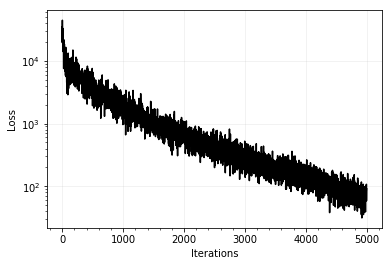

In [14]:
# Larger learning rate to address numerical imprecision.
learning_rate = 4e-5

# Randomly initialize the weights.
w_1 = torch.randn(num_in, num_hidden) # input -> hidden
w_2 = torch.randn(num_hidden, num_out) # hidden -> output

# We would like to compute the gradient with respect to the parameters of the model.
w_1.requires_grad = True
w_2.requires_grad = True

losses = []
for iteration in tqdm(training_iterations):
    # Fetch the input and corresponding output.
    inputs = torch.randn(batch_size, num_in)
    targets = torch.randn(batch_size, num_out)
    
    # Apply the `forward` computation of the neural network (compute the prediction).
    h = torch.matmul(inputs, w_1)
    activation = torch.clamp(h, min=0)
    y_predicted = torch.matmul(activation, w_2)
    
    # Compute loss.
    diff = y_predicted - targets
    loss = torch.pow(diff, 2).mean()
    losses.append(loss)
    
    # Apply backpropagation.
    loss.backward()
    
    # Update the weights.
    with torch.no_grad():
        # Update the weights with the derrived gradients.
        w_1 -= learning_rate * w_1.grad
        w_2 -= learning_rate * w_2.grad
        # Reset the accumulation of gradients.
        w_1.grad.zero_()
        w_2.grad.zero_()
    
# Show the loss over the training iterations.
plt.plot(training_iterations, losses, color="black")
plt.minorticks_on()
plt.yscale("log")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.grid(True, alpha=.2)
plt.show()

Voila!

## `torch.nn` modeling and training with `torch.optim`

All modules are instances of `torch.nn.Module`. These modules can be viewed as Lego(tm)-bricks which can be connected with each-other in some specific way. See the [`torch.nn`](https://pytorch.org/docs/stable/nn.html) documentation for more information.

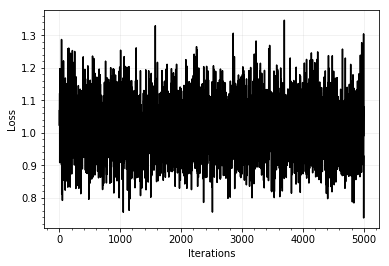

In [15]:
class Classifier(torch.nn.Module):
    
    def __init__(self, num_hidden):
        super(Classifier, self).__init__() # Required
        self.m_1 = torch.nn.Linear(100, num_hidden)
        self.m_2 = torch.nn.Linear(num_hidden, 10)
        self.activation = torch.nn.ReLU()
        
    def forward(self, inputs):
        h_1 = self.m_1(inputs)
        a_1 = self.activation(h_1)
        h_2 = self.m_2(a_1)
        
        return h_2

# Allocate the classifier.
classifier = Classifier(num_hidden=1000)

# Allocate the optimizer.
optimizer = torch.optim.SGD(classifier.parameters(), lr=0.01)

# Pick a loss function.
# https://pytorch.org/docs/stable/nn.html#loss-functions
criterion = torch.nn.MSELoss(reduction="mean") # By default all losses use a `mean` reduction.

# Start the training procedure.
losses = []
for iteration in tqdm(training_iterations):
    # Fetch a batch of inputs and targets.
    inputs = torch.randn(batch_size, 100)
    targets = torch.randn(batch_size, 10)
    # Forward pass.
    y_pred = classifier(inputs)
    # Compute the loss.
    loss = criterion(y_pred, targets)
    losses.append(loss.item())
    # Backward pass.
    optimizer.zero_grad() # Clear gradient accumulation.
    loss.backward()
    optimizer.step()
    
# Show the loss over the training iterations.
plt.plot(training_iterations, losses, color="black")
plt.minorticks_on()
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.grid(True, alpha=.2)
plt.show()

Alternatively, you can rely on the `Sequential` API (Keras-like):

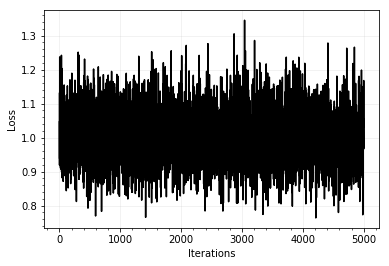

In [16]:
# Allocate the classifier.
classifier = torch.nn.Sequential(
    torch.nn.Linear(100, 1000),
    torch.nn.ReLU(),
    torch.nn.Linear(1000, 1000),
    torch.nn.ReLU(),
    torch.nn.Linear(1000, 10))

# Allocate the optimizer.
optimizer = torch.optim.SGD(classifier.parameters(), lr=0.01)

# Pick a loss function.
# https://pytorch.org/docs/stable/nn.html#loss-functions
criterion = torch.nn.MSELoss(reduction="mean") # By default all losses use a `mean` reduction.

# Start the training procedure.
losses = []
for iteration in tqdm(training_iterations):
    # Fetch a batch of inputs and targets.
    inputs = torch.randn(batch_size, 100)
    targets = torch.randn(batch_size, 10)
    # Forward pass.
    y_pred = classifier(inputs)
    # Compute the loss.
    loss = criterion(y_pred, targets)
    losses.append(loss.item())
    # Backward pass.
    optimizer.zero_grad() # Clear gradient accumulation.
    loss.backward()
    optimizer.step()
    
# Show the loss over the training iterations.
plt.plot(training_iterations, losses, color="black")
plt.minorticks_on()
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.grid(True, alpha=.2)
plt.show()

## Hello MNIST

### Data preprocessing and loading

In [17]:
# Fetch a batch of inputs and targets.
inputs = torch.randn(batch_size, 100)
targets = torch.randn(batch_size, 10)

`dataset` abstraction.

In [18]:
import torchvision

# Data preprocessing steps (standardization).
transformations = torchvision.transforms.Compose([
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize((0.1307,), (0.3081,))])
# Allocate the training dataset (and download it).
dataset_train = torchvision.datasets.MNIST("data", train=True, download=True, transform=transformations)
# Allocate the validation dataset using the same pre-processing transformations.
dataset_validation = torchvision.datasets.MNIST("data", train=False, download=True, transform=transformations)

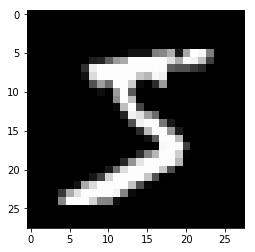

The number depicted in the image is a 5


In [19]:
image, label = dataset_train[0]

# Show the first image in the dataset.
plt.imshow(image.view(28, 28), cmap="gist_gray")
plt.show()

print("The number depicted in the image is a", label.item())

### Model development

The code below is a bit more complex than it should be, but it is intended to show how you could combine `torch.nn` modules.

In [20]:
class ConvolutionalLegoPiece(torch.nn.Module):
    
    def __init__(self):
        super(ConvolutionalLegoPiece, self).__init__()
        self.piece = torch.nn.Sequential(
            # First block.
            torch.nn.Conv2d(in_channels=1, out_channels=20, kernel_size=5, stride=1),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2), # Stride is set to `kernel_size` by default.
            # Second block.
            torch.nn.Conv2d(in_channels=20, out_channels=50, kernel_size=5, stride=1),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2))
        
    def forward(self, images):
        latents = self.piece(images)
        
        return latents

In [21]:
class FullyConnectedLegoPiece(torch.nn.Module):
    
    def __init__(self, latent_dimensionality=4 * 4 * 50, num_hidden=1000, num_classes=10):
        super(FullyConnectedLegoPiece, self).__init__()
        self.z_dim = latent_dimensionality
        self.piece = torch.nn.Sequential(
            torch.nn.Linear(self.z_dim, num_hidden),
            torch.nn.ReLU(),
            torch.nn.Linear(num_hidden, num_hidden),
            torch.nn.ReLU(),
            torch.nn.Linear(num_hidden, num_hidden),
            torch.nn.ReLU(),
            torch.nn.Linear(num_hidden, num_classes),
            torch.nn.LogSoftmax(dim=1))
        
    def forward(self, latents):
        latents = latents.view(-1, self.z_dim)
        return self.piece(latents)

### Training and testing

In [22]:
def train(model, optimizer, dataset, batch_size=256, workers=4):
    model.train() # Ensure all modules are in `training` mode.
    data_loader = torch.utils.data.DataLoader(dataset, shuffle=True, batch_size=batch_size, num_workers=workers)
    data_loader = iter(data_loader)
    criterion = torch.nn.NLLLoss()
    iterations = range(len(dataset) // batch_size)
    for batch_index in tqdm(iterations):
        inputs, targets = next(data_loader)
        prediction = model(inputs)
        loss = criterion(prediction, targets)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
def validate(model, dataset, batch_size=256, workers=4):
    model.eval()
    data_loader = torch.utils.data.DataLoader(dataset, shuffle=True, batch_size=batch_size, num_workers=workers)
    total_loss = 0
    criterion = torch.nn.NLLLoss(reduction="sum")
    with torch.no_grad():
        for inputs, targets in data_loader:
            outputs = model(inputs)
            loss = criterion(outputs, targets).item()
            total_loss += loss
    total_loss / len(dataset)
    
    return total_loss

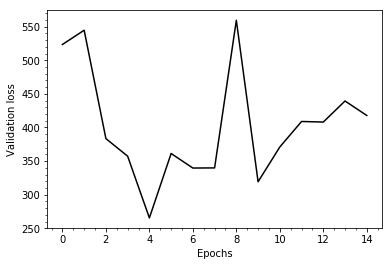

In [23]:
# Allocate the classifier.
classifier = torch.nn.Sequential(
    ConvolutionalLegoPiece(),
    FullyConnectedLegoPiece(num_hidden=1000, num_classes=10))
# Allocate the optimizer.
optimizer = torch.optim.Adam(classifier.parameters())

num_epochs = 15
validation_losses = []
for epoch in tqdm(range(num_epochs)):
    train(classifier, optimizer, dataset_train)
    validation_loss = validate(classifier, dataset_validation)
    validation_losses.append(validation_loss)
    
# Plot the validation loss.
plt.plot(np.arange(len(validation_losses)), validation_losses, color="black")
plt.minorticks_on()
plt.xlabel("Epochs")
plt.ylabel("Validation loss")
plt.show()

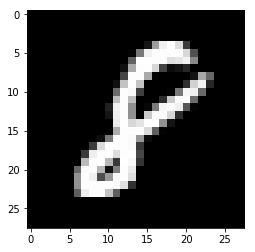

Predicted digit: 8


In [41]:
# Show the input
data_index = random.randint(0, 60000)
inputs = dataset_train[data_index][0].view(1, 1, 28, 28)
plt.imshow(inputs.view(28, 28).cpu().numpy(), cmap="gist_gray")
plt.show()

classifier = classifier.cpu()
print("Predicted digit:", classifier(inputs).exp().max(1)[1].item())

### GPU acceleration

In [25]:
# Check if a CUDA-enabled GPU is available.
if torch.cuda.is_available():
    device = torch.device(0)
else:
    device = "cpu"

In [26]:
def train(model, optimizer, dataset, batch_size=256, workers=4):
    model.train() # Ensure all modules are in `training` mode.
    data_loader = torch.utils.data.DataLoader(dataset, shuffle=True, batch_size=batch_size, num_workers=workers, pin_memory=True)
    data_loader = iter(data_loader)
    # Compute the loss in the GPU.
    criterion = torch.nn.NLLLoss().to(device)
    iterations = range(len(dataset) // batch_size)
    for batch_index in tqdm(iterations):
        inputs, targets = next(data_loader)
        # Transfer to the GPU.
        inputs = inputs.to(device)
        targets = targets.to(device)
        prediction = model(inputs)
        loss = criterion(prediction, targets)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
def validate(model, dataset):
    model.eval() # Set the model in 'evaluation' model.
    data_loader = torch.utils.data.DataLoader(dataset, shuffle=True, batch_size=32, num_workers=4, pin_memory=True)
    total_loss = 0
    criterion = torch.nn.NLLLoss(reduction="sum").to(device)
    with torch.no_grad():
        for inputs, targets in data_loader:
            inputs = inputs.to(device)
            targets = targets.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, targets).item()
            total_loss += loss
    
    return total_loss

Also check: [disadvantages of `pin_memory`](https://discuss.pytorch.org/t/what-is-the-disadvantage-of-using-pin-memory/1702/8).

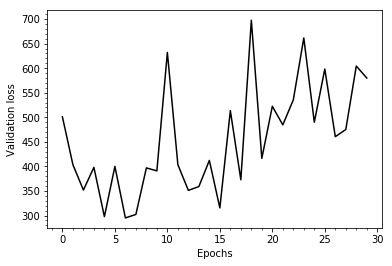

In [27]:
# Allocate the classifier.
classifier = torch.nn.Sequential(
    ConvolutionalLegoPiece(),
    FullyConnectedLegoPiece(num_hidden=1000, num_classes=10))
# Put the classifier on the GPU.
classifier = classifier.to(device)
# Allocate the optimizer.
optimizer = torch.optim.Adam(classifier.parameters())

num_epochs = 30
validation_losses = []
for epoch in tqdm(range(num_epochs)):
    train(classifier, optimizer, dataset_train)
    validation_loss = validate(classifier, dataset_validation)
    validation_losses.append(validation_loss)
    
# Plot the validation loss.
plt.plot(np.arange(len(validation_losses)), validation_losses, color="black")
plt.minorticks_on()
plt.xlabel("Epochs")
plt.ylabel("Validation loss")
plt.show()

### Regularization

`torch.nn.Dropout`, `torch.nn.BatchNorm2d`

In [28]:
class BatchNormConvolutionalLegoPiece(torch.nn.Module):
    
    def __init__(self):
        super(BatchNormConvolutionalLegoPiece, self).__init__()
        self.piece = torch.nn.Sequential(
            # First block.
            torch.nn.Conv2d(in_channels=1, out_channels=20, kernel_size=5, stride=1),
            torch.nn.BatchNorm2d(20),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2), # Stride is set to `kernel_size` by default.
            # Second block.
            torch.nn.Conv2d(in_channels=20, out_channels=50, kernel_size=5, stride=1),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2))
        
    def forward(self, images):
        latents = self.piece(images)
        
        return latents

In [29]:
class RegularizedFullyConnectedLegoPiece(torch.nn.Module):
    
    def __init__(self, latent_dimensionality=4 * 4 * 50, num_hidden=1000, num_classes=10, p=0.5):
        super(RegularizedFullyConnectedLegoPiece, self).__init__()
        self.z_dim = latent_dimensionality
        self.piece = torch.nn.Sequential(
            torch.nn.Dropout(p=p),
            torch.nn.Linear(self.z_dim, num_hidden),
            torch.nn.ReLU(),
            torch.nn.Dropout(p=p),
            torch.nn.Linear(num_hidden, num_hidden),
            torch.nn.ReLU(),
            torch.nn.Dropout(p=p),
            torch.nn.Linear(num_hidden, num_hidden),
            torch.nn.ReLU(),
            torch.nn.Linear(num_hidden, num_classes),
            torch.nn.LogSoftmax(dim=1))
        
    def forward(self, latents):
        latents = latents.view(-1, self.z_dim)
        return self.piece(latents)

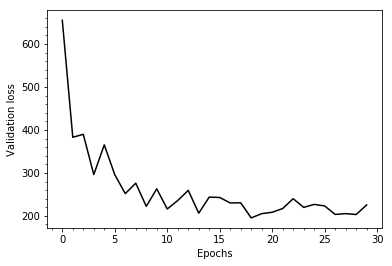

In [30]:
# Allocate the classifier.
classifier = torch.nn.Sequential(
    BatchNormConvolutionalLegoPiece(),
    RegularizedFullyConnectedLegoPiece(num_hidden=1000, num_classes=10))
# Put the classifier on the GPU.
classifier = classifier.to(device)
# Allocate the optimizer.
optimizer = torch.optim.Adam(classifier.parameters())

num_epochs = 30
validation_losses = []
for epoch in tqdm(range(num_epochs)):
    train(classifier, optimizer, dataset_train)
    validation_loss = validate(classifier, dataset_validation)
    validation_losses.append(validation_loss)
    
# Plot the validation loss.
plt.plot(np.arange(len(validation_losses)), validation_losses, color="black")
plt.minorticks_on()
plt.xlabel("Epochs")
plt.ylabel("Validation loss")
plt.show()

### Saving and loading models (checkpointing)

In [31]:
!mkdir models

mkdir: cannot create directory ‘models’: File exists


/home/joeri/Anaconda/lib/python3.7/site-packages/torch/serialization.py:251: UserWarning: Couldn't retrieve source code for container of type BatchNormConvolutionalLegoPiece. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/home/joeri/Anaconda/lib/python3.7/site-packages/torch/serialization.py:251: UserWarning: Couldn't retrieve source code for container of type RegularizedFullyConnectedLegoPiece. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


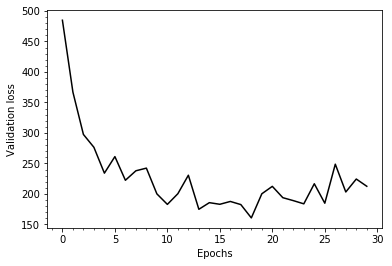

In [32]:
# Allocate the classifier.
classifier = torch.nn.Sequential(
    BatchNormConvolutionalLegoPiece(),
    RegularizedFullyConnectedLegoPiece(num_hidden=1000, num_classes=10))
# Put the classifier on the GPU.
classifier = classifier.to(device)
# Allocate the optimizer.
optimizer = torch.optim.Adam(classifier.parameters())

num_epochs = 30
validation_losses = []
for epoch in tqdm(range(num_epochs)):
    train(classifier, optimizer, dataset_train)
    validation_loss = validate(classifier, dataset_validation)
    torch.save(classifier, "models/" + str(epoch) + ".model")
    validation_losses.append(validation_loss)
    
# Plot the validation loss.
plt.plot(np.arange(len(validation_losses)), validation_losses, color="black")
plt.minorticks_on()
plt.xlabel("Epochs")
plt.ylabel("Validation loss")
plt.show()

In [33]:
!ls models

0.model   13.model  17.model  20.model	24.model  28.model  4.model  8.model
10.model  14.model  18.model  21.model	25.model  29.model  5.model  9.model
11.model  15.model  19.model  22.model	26.model  2.model   6.model
12.model  16.model  1.model   23.model	27.model  3.model   7.model


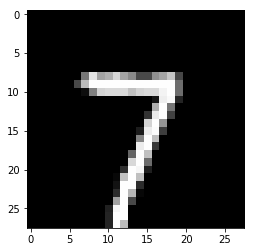

Predicted digit: 7


In [34]:
classifier = torch.load("models/29.model")
classifier.eval() # Set in "evaluation" mode. Important!!

# Show the input
data_index = random.randint(0, 60000)
inputs = dataset_train[data_index][0].view(1, 1, 28, 28).cuda()
plt.imshow(inputs.view(28, 28).cpu().numpy(), cmap="gist_gray")
plt.show()

print("Predicted digit:", classifier(inputs).exp().max(1)[1].item())

## Tensorboard

`pip install tensorboard`

`pip install tensorboardX` (for PyTorch and other frameworks)

Start the instance using `tensorboard --logdir='./logs' --port=8000`

In [35]:
from tensorboardX import SummaryWriter

writer = SummaryWriter()

In [36]:
def log_loss(iteration, loss):
    writer.add_scalar("training/loss", loss.item(), iteration)

def train(model, optimizer, dataset, batch_size=256, workers=4):
    model.train() # Ensure all modules are in `training` mode.
    data_loader = torch.utils.data.DataLoader(dataset, shuffle=True, batch_size=batch_size, num_workers=workers, pin_memory=True)
    data_loader = iter(data_loader)
    # Compute the loss in the GPU.
    criterion = torch.nn.NLLLoss().to(device)
    iterations = range(len(dataset) // batch_size)
    for batch_index in tqdm(iterations):
        inputs, targets = next(data_loader)
        # Transfer to the GPU.
        inputs = inputs.to(device)
        targets = targets.to(device)
        prediction = model(inputs)
        loss = criterion(prediction, targets)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        # Log to Tensorboard.
        log_loss(batch_index, loss)
        
def validate(model, dataset):
    model.eval() # Set the model in 'evaluation' model.
    data_loader = torch.utils.data.DataLoader(dataset, shuffle=True, batch_size=32, num_workers=4, pin_memory=True)
    total_loss = 0
    criterion = torch.nn.NLLLoss(reduction="sum").to(device)
    with torch.no_grad():
        for inputs, targets in data_loader:
            inputs = inputs.to(device)
            targets = targets.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, targets).item()
            total_loss += loss
    
    return total_loss

In [37]:
# Clean up everything.
writer.close()

<br><br><br><br><center><h1>Have fun!</h1></center>